In [1]:
!pip install celluloid
import numpy as np
import scipy as scipy
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D
import gzip
from sklearn.preprocessing import OneHotEncoder
from scipy.special import expit
import celluloid
from celluloid import Camera
from matplotlib import animation
from IPython.display import HTML
from matplotlib.lines import Line2D

np.random.seed(2021)

def lplot(Ys,labels=['1','2','3','4','5','6'],ylabel='Function value'):
    """Line plot of the Y values. (Same as above, but no animation).
    Ys is a list where each element is an array of numbers to plot.
    """
    colors = ['blue','red','green','black','cyan','purple','pink']
    fig, ax = plt.subplots(figsize=(6,6))
    T = len(Ys[0])
    plt.yscale('log')
    handles = []
    for i in range(len(Ys)):
        handles.append(Line2D([0], [0], color=colors[i], label=labels[i]))
    plt.legend(handles = handles, loc = 'upper right')
    plt.xlabel('Step')
    plt.ylabel(ylabel)
    for j in range(len(Ys)):
        plt.plot(range(T),Ys[j][:T],color=colors[j],marker='o')

In [ ]:
def power_iteration(U, G, v0, T=100):
    vs = [v0]
    v = v0
    Ut = np.transpose(U)
    
    for i in range(T):
        u = Ut.dot(v)
        u = U.dot(u)
        u = u + G.dot(v)
        v = u/np.linalg.norm(u)
        vs.append(v)

    return np.array(vs)

def scipy_default(X):
    u,s,vt = scipy.sparse.linalg.svds(X,k=1)
    return np.transpose(vt)

# Test Run: T = 1000

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


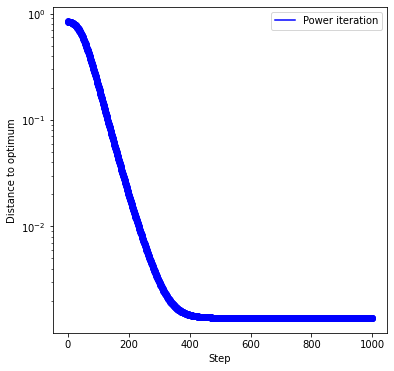

In [ ]:
lrs = [0.1]

n = 10000
p = .01
R = np.random.rand(n, n)
O = np.zeros((n, n))
O[R < p] = 1
G = np.random.normal(0, 1, (n,n))
G[O == 0] = 0
print(G)

k = 20
U = np.random.normal(0, 1, (n,k))
Z = (U @ U.T) + G

T = 1000

distances1 = []
s1 = []
v0 = np.random.normal(0,1,(n,1))
v0 = v0/np.linalg.norm(v0)

vtrue = scipy_default(Z)

Vs = power_iteration(U, G, v0, T)

dist_pi= [np.linalg.norm(np.abs(v) - np.abs(vtrue)) for v in Vs]
distances1.append(dist_pi)
s1.append(f'Power iteration')

lplot(distances1,s1,'Distance to optimum')

# 5a. Timing table

In [ ]:
import time

n = 10000
p = .01
R = np.random.rand(n, n)
O = np.zeros((n, n))
O[R < p] = 1
G = np.random.normal(0, 1, (n,n))
G[O == 0] = 0

k = 20
U = np.random.normal(0, 1, (n,k))
Z = (U @ U.T) + G

T = 1000

distances1 = []
s1 = []
v0 = np.random.normal(0,1,(n,1))
v0 = v0/np.linalg.norm(v0)

Ts = np.arange(10, 110, 10)

times = [0] * 11

start = time.time();
for i in range(10):
    vtrue = scipy_default(Z)
end = time.time()
times[0] = (end - start) / 10

index = 1
for T in Ts:
    start = time.time()
    for i in range(10):
        Vs = power_iteration(U, G, v0, T)
    end = time.time()
    times[index] = (end - start) / 10
    index = index + 1

print ("{:<8} {:<15}".format('T', 'Time'))
print ("{:<8} {:<15}".format('In-built', times[0]))
for i in range(1, 11):
    print ("{:<8} {:<15}".format(Ts[i-1], times[i]))

T        Time           
In-built 6.122656726837159
10       0.611600136756897
20       1.2323015213012696
30       1.834072232246399
40       2.435634708404541
50       3.0591841459274294
60       3.6913986682891844
70       4.280641365051269
80       4.8633181095123295
90       5.455540823936462
100      6.042231750488281


5b. Error Plots

[0.8320551614849687, 0.7882881101796135, 0.7193445039915539, 0.6338709738044364, 0.5605352876953695, 0.5075812979488968, 0.46911107865578955, 0.4388863655398718, 0.4124524966751687, 0.38838794621175193, 0.36602850024619565, 0.3448552458304963, 0.32446572520999467, 0.30498062326566183, 0.28629572619253846, 0.268581330323039, 0.25181793830436255, 0.23599271564317398, 0.22097974180747587, 0.2067423938168061, 0.19328900261395707, 0.18056417603456643, 0.1685871773135068, 0.1573547183712129, 0.14686289976434597]


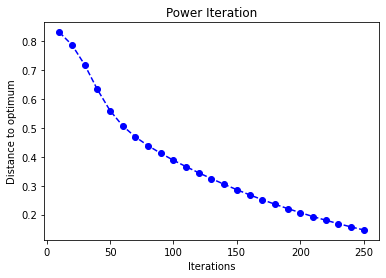

In [ ]:
def power_iteration(U, G, v0, T=100):
    vs = [v0]
    v = v0
    Ut = np.transpose(U)
    
    for i in range(T):
        u = Ut.dot(v)
        u = U.dot(u)
        u = u + G.dot(v)
        v = u/np.linalg.norm(u)
        vs.append(v)

    return v
def scipy_default(X):
    u,s,vt = scipy.sparse.linalg.svds(X,k=1)
    return np.transpose(vt)

import time

n = 10000
p = .01
R = np.random.rand(n, n)
O = np.zeros((n, n))
O[R < p] = 1
G = np.random.normal(0, 1, (n,n))
G[O == 0] = 0

k = 20
U = np.random.normal(0, 1, (n,k))
Z = (U @ U.T) + G

distances1 = []
s1 = []
v0 = np.random.normal(0,1,(n,1))
v0 = v0/np.linalg.norm(v0)

Ts = np.arange(10, 260, 10)

start = time.time();
vtrue = scipy_default(Z)

index = 1
for T in Ts:
    distance = 0
    for i in range(10):
        Vs = power_iteration(U, G, v0, T)
        distance += np.linalg.norm(np.abs(Vs) - np.abs(vtrue))
    distances1.append(distance / 10)
s1.append(f'Power iteration')

plt.plot(Ts, distances1, '--bo')
plt.title('Power Iteration')
plt.ylabel('Distance to optimum')
plt.xlabel('Iterations')
plt.show() 

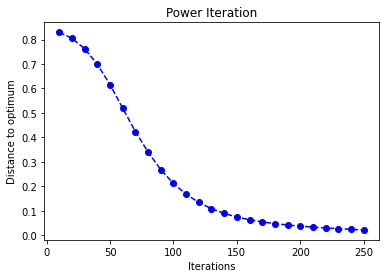

In [ ]:
def power_iteration(U, G, v0, T=100):
    vs = [v0]
    v = v0
    Ut = np.transpose(U)
    
    for i in range(T):
        u = Ut.dot(v)
        u = U.dot(u)
        u = u + G.dot(v)
        v = u/np.linalg.norm(u)
        vs.append(v)

    return v
def scipy_default(X):
    u,s,vt = scipy.sparse.linalg.svds(X,k=1)
    return np.transpose(vt)

import time

n = 10000
p = .01
R = np.random.rand(n, n)
O = np.zeros((n, n))
O[R < p] = 1
G = np.random.normal(0, 1, (n,n))
G[O == 0] = 0

k = 20
U = np.random.normal(0, 1, (n,k))
Z = (U @ U.T) + G

distances1 = []
s1 = []
v0 = np.random.normal(0,1,(n,1))
v0 = v0/np.linalg.norm(v0)
newV = np.random.normal(0,0,(n,1))

Ts = np.arange(10, 260, 10)

start = time.time();
vtrue = scipy_default(Z)

index = 1
for T in Ts:
    distance = 0
    for i in range(10):
        Vs = power_iteration(U, G, v0, 10)
        distance += np.linalg.norm(np.abs(Vs) - np.abs(vtrue))
        newV = newV + Vs
    v0 = newV / 10
    distances1.append(distance / 10)
s1.append(f'Power iteration')

plt.plot(Ts, distances1, '--bo')
plt.title('Power Iteration')
plt.ylabel('Distance to optimum')
plt.xlabel('Iterations')
plt.show() 

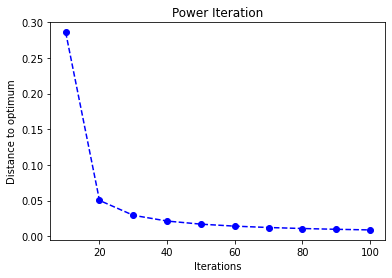

In [12]:

def power_iteration(U, G, v0, T=100):
    vs = [v0]
    v = v0
    Ut = np.transpose(U)
    
    for i in range(T):
        u = Ut.dot(v)
        u = U.dot(u)
        u = u + G.dot(v)
        v = u/np.linalg.norm(u)
        vs.append(v)

    return v
def scipy_default(X):
    u,s,vt = scipy.sparse.linalg.svds(X,k=1)
    return np.transpose(vt)

import time

n = 10000
p = .01
R = np.random.rand(n, n)
O = np.zeros((n, n))
O[R < p] = 1
G = np.random.normal(0, 1, (n,n))
G[O == 0] = 0

k = 20
U = np.random.normal(0, 1, (n,k))

u,s,vt = scipy.sparse.linalg.svds(U,k=1)
a = 0.07
U = U + a * s[0] * np.outer(u, vt)

Z = (U @ U.T) + G

distances1 = []
s1 = []
v0 = np.random.normal(0,1,(n,1))
v0 = v0/np.linalg.norm(v0)
newV = np.random.normal(0,0,(n,1))

Ts = np.arange(10, 110, 10)

start = time.time();
vtrue = scipy_default(Z)

index = 1
for T in Ts:
    distance = 0
    for i in range(10):
        Vs = power_iteration(U, G, v0, 10)
        distance += np.linalg.norm(np.abs(Vs) - np.abs(vtrue))
        newV = newV + Vs
    v0 = newV / 10
    distances1.append(distance / 10)
s1.append(f'Power iteration')

plt.plot(Ts, distances1, '--bo')
plt.title('Power Iteration')
plt.ylabel('Distance to optimum')
plt.xlabel('Iterations')
plt.show() 